In [1]:
import tensorflow as tf
import numpy as np
from model import bioRNN
from training import supervised_train_step
from stp_stimulus import Stimulus
import matplotlib.pyplot as plt
from IPython.display import HTML

--> Loading parameters...
--> Parameters successfully loaded.



In [2]:
# Choose GPU
gpu_idx = 3
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[gpu_idx], 'GPU')

In [3]:
# Data generator
stim = Stimulus() # DMS, go to stp_stimulus and down to 'trial_type' to change it
trial_info = stim.generate_trial()

In [4]:
trial_info.keys()

dict_keys(['desired_output', 'train_mask', 'sample', 'test', 'rule', 'match', 'catch', 'probe', 'neural_input'])

In [5]:
inputs = trial_info['neural_input']
labels = trial_info['desired_output']
mask = trial_info['train_mask']

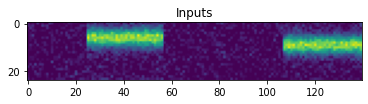

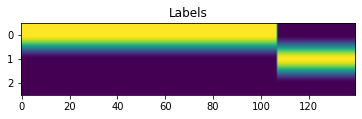

In [6]:
b = np.random.randint(inputs.shape[1])

# Inputs
plt.imshow(inputs[:,b,:].T)
plt.title('Inputs')
plt.show()

# Labels
plt.imshow(labels[:,b,:].T, aspect=10.0)
plt.title('Labels')
plt.show()

In [7]:
# Model hyper-params
hidden_size = 128
output_size = labels.shape[-1]
synapse_config = 'full'

# Optimization hyper-params
learning_rate = 1e-2
n_iterations = 1000

In [8]:
# Define a model
rnn = bioRNN(hidden_size, output_size, synapse_config=synapse_config)
opt = tf.keras.optimizers.Adam(learning_rate=float(learning_rate))

In [9]:
# Train the model
loss_list = []
acc_list = []
print('\n=== TRAINING === \n')
for i in range(n_iterations):
    trial_info = stim.generate_trial()
    inputs = trial_info['neural_input'].astype(np.float32)
    labels = trial_info['desired_output'].astype(np.float32)
    mask = trial_info['train_mask'].astype(np.float32)
    metrics = supervised_train_step(rnn, opt, inputs, labels, train_mask=mask)
    loss = round(float(metrics['loss']), 2)
    acc = round(float(metrics['argmax_accuracy']), 2)
    dec_acc = round(float(metrics['decision_accuracy']), 2)
    fix_acc = round(float(metrics['fixation_accuracy']), 2)
    loss_list.append(loss)
    acc_list.append(acc)
    if i%100==0:
        print(f'Iter: {i} | Loss: {loss} | Acc: {acc} | Fixation Acc: {fix_acc} | Decision Acc: {dec_acc}')


=== TRAINING === 

Iter: 0 | Loss: 1.35 | Acc: 0.12 | Fixation Acc: 0.96 | Decision Acc: 0.01
Iter: 100 | Loss: 0.18 | Acc: 0.88 | Fixation Acc: 0.23 | Decision Acc: 0.97
Iter: 200 | Loss: 0.16 | Acc: 0.91 | Fixation Acc: 0.92 | Decision Acc: 0.9
Iter: 300 | Loss: 0.13 | Acc: 0.93 | Fixation Acc: 0.75 | Decision Acc: 0.96
Iter: 400 | Loss: 0.11 | Acc: 0.94 | Fixation Acc: 0.76 | Decision Acc: 0.96
Iter: 500 | Loss: 0.1 | Acc: 0.95 | Fixation Acc: 0.88 | Decision Acc: 0.96
Iter: 600 | Loss: 0.11 | Acc: 0.95 | Fixation Acc: 0.89 | Decision Acc: 0.96
Iter: 700 | Loss: 0.08 | Acc: 0.96 | Fixation Acc: 0.82 | Decision Acc: 0.97
Iter: 800 | Loss: 0.08 | Acc: 0.96 | Fixation Acc: 0.91 | Decision Acc: 0.97
Iter: 900 | Loss: 0.07 | Acc: 0.96 | Fixation Acc: 0.89 | Decision Acc: 0.98
Iter: 1000 | Loss: 0.06 | Acc: 0.97 | Fixation Acc: 0.86 | Decision Acc: 0.99
Iter: 1100 | Loss: 0.07 | Acc: 0.97 | Fixation Acc: 0.9 | Decision Acc: 0.98
Iter: 1200 | Loss: 0.05 | Acc: 0.98 | Fixation Acc: 0.89 | 

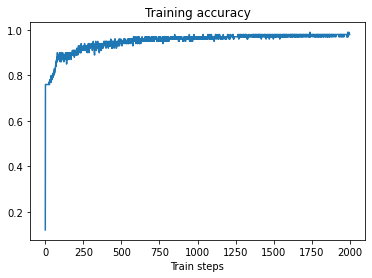

In [13]:
# Plot accuracies
plt.plot(acc_list)
plt.title('Training accuracy')
plt.xlabel('Train steps')
plt.show()

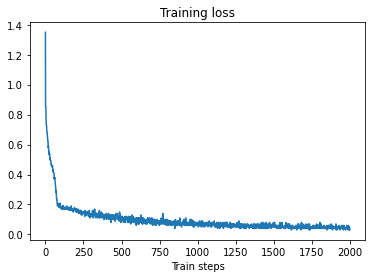

In [14]:
# Plot loss
plt.plot(loss_list)
plt.title('Training loss')
plt.xlabel('Train steps')
plt.show()

In [12]:
# Look at an example trial with the model's actions
    trial_info = stim.generate_trial()
    inputs = trial_info['neural_input'].astype(np.float32)
    labels = trial_info['desired_output'].astype(np.float32)
    mask = trial_info['train_mask'].astype(np.float32)
results = rnn.do_trial(inputs)
action_idxs = tf.math.argmax(results['outputs'], axis=-1) # (T, B)
actions = tf.one_hot(action_idxs, output_size)

b = np.random.randint(inputs.shape[1])

# Inputs
plt.imshow(inputs[:,b,:].T)
plt.title('Inputs')
plt.show()

# Labels
plt.imshow(labels[:,b,:].T, aspect=3.0)
plt.title('Labels')
plt.show()

# Actions
plt.imshow(actions[:,b,:].T, aspect=3.0)
plt.title('Actions')
plt.show()

NameError: name 'task_idx' is not defined